# Flight Delays Exploration

[Inês Rosete](http://www.linkedin.com/in/inesrosete) | April, 2018

The analysis I'm going to perform is based on [2015 Flight Delays and Cancellations](https://www.kaggle.com/usdot/flight-delays) Kaggle's challenge. I used this challenge to learn / practice pandas (it was my first big challenge!), **exploratory data analysis** and **feature engineering** techniques. Topics like **temporal analysis**, **feature selection** and **logistic regression** also will be addressed. This notebook has been divided into three main sections. The first part deals with the development of a baseline model. Afterwards, I will go into detail, through data analysis and feature engineering, to improve the performance of the model. Finally, I will present a logistic regression and the conclusions drawn from it.


**Note:** So that the data fits in memory, in this notebook, I decided to work only with data until June (inc). I.e., 6 months of flights information. The data structure is the same and can be obtained [here](https://www.kaggle.com/usdot/flight-delays/data).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Section-A" data-toc-modified-id="Section-A-1">Section A</a></span><ul class="toc-item"><li><span><a href="#A1.-Read-datasets" data-toc-modified-id="A1.-Read-datasets-1.1">A1. Read datasets</a></span></li><li><span><a href="#A2.-Flights-Dataset-statistics" data-toc-modified-id="A2.-Flights-Dataset-statistics-1.2">A2. Flights Dataset statistics</a></span><ul class="toc-item"><li><span><a href="#A2.1-Target-variable" data-toc-modified-id="A2.1-Target-variable-1.2.1">A2.1 Target variable</a></span></li><li><span><a href="#A2.2-Data-types" data-toc-modified-id="A2.2-Data-types-1.2.2">A2.2 Data types</a></span></li><li><span><a href="#A2.3-Detailed-statistics-for-each-column" data-toc-modified-id="A2.3-Detailed-statistics-for-each-column-1.2.3">A2.3 Detailed statistics for each column</a></span></li><li><span><a href="#A2.4-Null-values" data-toc-modified-id="A2.4-Null-values-1.2.4">A2.4 Null values</a></span></li></ul></li><li><span><a href="#A3.-Build-baseline" data-toc-modified-id="A3.-Build-baseline-1.3">A3. Build baseline</a></span><ul class="toc-item"><li><span><a href="#A3.1-Data-preparation" data-toc-modified-id="A3.1-Data-preparation-1.3.1">A3.1 Data preparation</a></span></li><li><span><a href="#A3.2-Build-model" data-toc-modified-id="A3.2-Build-model-1.3.2">A3.2 Build model</a></span></li><li><span><a href="#A3.3-Assessing-model-performance" data-toc-modified-id="A3.3-Assessing-model-performance-1.3.3">A3.3 Assessing model performance</a></span></li></ul></li></ul></li><li><span><a href="#Section-B" data-toc-modified-id="Section-B-2">Section B</a></span><ul class="toc-item"><li><span><a href="#B1.-Data-understanding" data-toc-modified-id="B1.-Data-understanding-2.1">B1. Data understanding</a></span><ul class="toc-item"><li><span><a href="#B1.1-Build-timestamp-field" data-toc-modified-id="B1.1-Build-timestamp-field-2.1.1">B1.1 Build timestamp field</a></span></li><li><span><a href="#B1.2-Remove-unnecessary-columns" data-toc-modified-id="B1.2-Remove-unnecessary-columns-2.1.2">B1.2 Remove unnecessary columns</a></span></li><li><span><a href="#B1.3-Delayed-flight-information" data-toc-modified-id="B1.3-Delayed-flight-information-2.1.3">B1.3 Delayed flight information</a></span></li><li><span><a href="#B1.4-Temporal-analysis" data-toc-modified-id="B1.4-Temporal-analysis-2.1.4">B1.4 Temporal analysis</a></span></li><li><span><a href="#B1.5-Including-context-information" data-toc-modified-id="B1.5-Including-context-information-2.1.5">B1.5 Including context information</a></span></li></ul></li><li><span><a href="#B2.-Feature-engineering" data-toc-modified-id="B2.-Feature-engineering-2.2">B2. Feature engineering</a></span><ul class="toc-item"><li><span><a href="#B2.1-Historical-data" data-toc-modified-id="B2.1-Historical-data-2.2.1">B2.1 Historical data</a></span></li><li><span><a href="#B2.2-New-temporal-features" data-toc-modified-id="B2.2-New-temporal-features-2.2.2">B2.2 New temporal features</a></span></li><li><span><a href="#B2.3-Risky-features-and-OHE" data-toc-modified-id="B2.3-Risky-features-and-OHE-2.2.3">B2.3 Risky features and OHE</a></span></li><li><span><a href="#B2.4-Normalization" data-toc-modified-id="B2.4-Normalization-2.2.4">B2.4 Normalization</a></span></li><li><span><a href="#B2.5-Remove-unnecessary-columns" data-toc-modified-id="B2.5-Remove-unnecessary-columns-2.2.5">B2.5 Remove unnecessary columns</a></span></li></ul></li></ul></li><li><span><a href="#Section-C" data-toc-modified-id="Section-C-3">Section C</a></span><ul class="toc-item"><li><span><a href="#C1.-Fill-NaNs" data-toc-modified-id="C1.-Fill-NaNs-3.1">C1. Fill NaNs</a></span></li><li><span><a href="#C2.-Build-logistic-regression" data-toc-modified-id="C2.-Build-logistic-regression-3.2">C2. Build logistic regression</a></span></li><li><span><a href="#C3.-Build-decision-tree" data-toc-modified-id="C3.-Build-decision-tree-3.3">C3. Build decision tree</a></span></li><li><span><a href="#C4.-Conclusion" data-toc-modified-id="C4.-Conclusion-3.4">C4. Conclusion</a></span></li></ul></li><li><span><a href="#You-may-also-like" data-toc-modified-id="You-may-also-like-4">You may also like</a></span></li><li><span><a href="#Acknowledgments" data-toc-modified-id="Acknowledgments-5">Acknowledgments</a></span></li></ul></div>

___
Let's start by loading all the dependencies we will need.

In [3]:
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from os import listdir
from os.path import isfile, join
from sklearn import linear_model
from pandas import Series

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# inline matplotlib plots
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 6  # default image size

# all pandas prints will have this format
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 200)

## Section A

___
### A1. Read datasets
___

Now it is time to get a clear and concise picture of what is inside of each dataset and what we can do with it. There are three datasets:
* **`airlines`**
* **`airports`**
* **`flights_until_june`**

In [4]:
path = 'data'

airlines = pd.read_csv(join(path, 'airlines.csv'))
airports = pd.read_csv(join(path, 'airports.csv'))
# I'm specifiying different types for each column due to memory consumption
flights =  pd.read_csv(join(path, 'flights_until_june.csv'),
                     dtype={'air_system_delay': 'float32',
                            'air_time': 'float32',
                            'airline': 'category',
                            'airline_delay': 'float32',
                            'arrival_delay': 'float32',
                            'arrival_time': 'float32',
                            'cancellation_reason': 'category',
                            'cancelled': 'bool',
                            'day': 'int32',
                            'day_of_week': 'int32',
                            'departure_delay': 'float32',
                            'departure_time': 'float32',
                            'destination_airport': 'object',
                            'distance': 'int32',
                            'diverted': 'bool',
                            'elapsed_time': 'float32',
                            'flight_number': 'int32',
                            'late_aircraft_delay': 'float32',
                            'month': 'int32',
                            'origin_airport': 'object',
                            'scheduled_arrival': 'float32',
                            'scheduled_departure': 'float32',
                            'scheduled_time': 'float32',
                            'security_delay': 'float32',
                            'tail_number': 'object',
                            'taxi_in': 'float32',
                            'taxi_out': 'float32',
                            'weather_delay': 'float32',
                            'wheels_off': 'float32',
                            'wheels_on': 'float32',
                            'year': 'int32'}
    )

Before we continue, let's confirm whether the number of rows and columns per dataset are the expected.

In [5]:
assert airlines.shape == (14, 2)
assert airports.shape == (322, 7)
assert flights.shape == (2889512, 31)

print('airlines:', airlines.shape)
print('airports:', airports.shape)
print('flights:', flights.shape)

airlines: (14, 2)
airports: (322, 7)
flights: (2889512, 31)


Ok, let's have a glance on the data and check if everything looks right.

In [4]:
airlines

,iata_code,airline
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [5]:
airports.head(10)

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.652,-75.440
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.411,-99.682
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.040,-106.609
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.449,-98.422
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.536,-84.194
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.253,-70.060
6,ACT,Waco Regional Airport,Waco,TX,USA,31.611,-97.231
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.978,-124.109
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.458,-74.577
9,ADK,Adak Airport,Adak,AK,USA,51.878,-176.646


In [6]:
flights.head(10)

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5.000,"2,354.000",-11.000,21.000,15.000,205.000,194.000,169.000,1448,404.000,4.000,430.000,408.000,-22.000,False,False,NaN,nan,nan,nan,nan,nan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10.000,2.000,-8.000,12.000,14.000,280.000,279.000,263.000,2330,737.000,4.000,750.000,741.000,-9.000,False,False,NaN,nan,nan,nan,nan,nan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20.000,18.000,-2.000,16.000,34.000,286.000,293.000,266.000,2296,800.000,11.000,806.000,811.000,5.000,False,False,NaN,nan,nan,nan,nan,nan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20.000,15.000,-5.000,15.000,30.000,285.000,281.000,258.000,2342,748.000,8.000,805.000,756.000,-9.000,False,False,NaN,nan,nan,nan,nan,nan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25.000,24.000,-1.000,11.000,35.000,235.000,215.000,199.000,1448,254.000,5.000,320.000,259.000,-21.000,False,False,NaN,nan,nan,nan,nan,nan
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25.000,20.000,-5.000,18.000,38.000,217.000,230.000,206.000,1589,604.000,6.000,602.000,610.000,8.000,False,False,NaN,nan,nan,nan,nan,nan
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25.000,19.000,-6.000,11.000,30.000,181.000,170.000,154.000,1299,504.000,5.000,526.000,509.000,-17.000,False,False,NaN,nan,nan,nan,nan,nan
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30.000,44.000,14.000,13.000,57.000,273.000,249.000,228.000,2125,745.000,8.000,803.000,753.000,-10.000,False,False,NaN,nan,nan,nan,nan,nan
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30.000,19.000,-11.000,17.000,36.000,195.000,193.000,173.000,1464,529.000,3.000,545.000,532.000,-13.000,False,False,NaN,nan,nan,nan,nan,nan
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30.000,33.000,3.000,12.000,45.000,221.000,203.000,186.000,1747,651.000,5.000,711.000,656.000,-15.000,False,False,NaN,nan,nan,nan,nan,nan


After loading the datasets I'm in condition to start analysing the data. Let's start by the basics: define each column.

Definitions and quick thoughts:

** Airlines ** - Has information regarding each airline
* **iata_code** - Airline identifier. 
* **airline** - Airline's name. 

** Airports ** - Has information regarding each airport
* **iata_code** - Airline identifier.
* **airport** - Airport's name.
* **city** - City name of the airport.
* **state** - State name of the airport.
* **country** - Country name of the airport.
* **latitude** and **longitude** - Latitude and longitude of the airport. Numerical variables that can be used to identify the airport geographically within a map or to calculate the average velocity of each flight.

** Flights until June ** (main features) - Has information regarding each flight
* **year**, **month** and **day**- Year, month and day of the flight. Numerical variables that will be used in temporal context.
* **day_of_week** - Day of week of the flight. This variable may be interesting to see the variation of flights per week.
* **airline** - Airline identifier
* **origin_airport** - Starting airport.
* **destination_airport** - Destination airport.
* **schedule_departure** - Planned departure time
* **departure_time** - WHEEL_OFF - TAXI_OUT
* **wheels_off** - The time point that the aircraft's wheels leave the ground
* **taxi_out** - The time duration elapsed between departure from the origin airport gate and wheels off
* **canceled** - Flight Canceled (1 = canceled)
* **cancellation_reason** - Reason for cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
* **departure_delay** - Total Delay on departure
* **arrival_delay** - Total Delay on arrival (what we want to predict)


After this first glance on the data it is possible to observe that:

* in `airport` dataset there is detailed information about the airports so that it is possible to infer the distances between them. This information could be useful as predictor for the model and we may want to build other features like flight average velocity;
* in `flight` dataset there are three columns for the date (`year`,` month` and `day`) that we can convert to just one column. It should also be noted that the `schedule_time` and `departure_time` columns should display a time, however we can observe numerical values (how is the time being displayed?!). Finally, it is observed that there is no target variable.

Since `airlines` and `airports` datasets have only context information I decided to focus my analysis in `flights_until_june` dataset. Ok, let's then analyze it in detail!

___
### A2. Flights Dataset statistics
___

In this section I'm going to try to understand more regarding each column, like the data type and it distribution. In a field where  **Statistic** plays an important role (to not say that plays the main role) I will try, as much as I can, make informed decisions. This being said, besides distribution of each column, I will calculate **min** and **max** values, **mean**, **standard deviation**, and **count** of each column (it can give me an idea about the volume of data). To do that I will use pandas library, that gives those basic statistics almost for free.

#### A2.1 Target variable

You might wonder why I said that we do not have a target variable once we have an `arrival_delay` column with flight delay information. And you are correct!

We could use `arrival_delay` if we consider this a regression problem (predict continuous values), however I want to tackle this as a classification problem, where I want to predict whether or not a flight will be delayed. This being said let's define our target variable.

In [7]:
# a flight is considered delayed if the delay is greater or equal than 15 min
flights['is_delayed'] = flights.arrival_delay >= 15

In [8]:
flights.groupby('is_delayed').is_delayed.count()

is_delayed
False    2315296
True      574216
Name: is_delayed, dtype: int64

In [9]:
flights.groupby('is_delayed').is_delayed.count().map(lambda x: '{:.2%}'.format(x/flights.shape[0]))

is_delayed
False    80.13%
True     19.87%
Name: is_delayed, dtype: object

Ok, in this quick analysis it is possible to understand that only 1/4 of the flights are delayed, therefore we can consider this as an unbalance problem. Thus, we need to make wise decisions. For example, if we decided to use accuracy as our evaluation metric, a dumb model that predicts each flight as on time would have an accuracy of 80%, which seems to be a good result but in this context is as bad as a random model. Later we will analyse this in detail.

#### A2.2 Data types

I'm going to check the data type of each column. Based on that we can do different calculations, i.e., regarding categorical columns (`category` or `string`) we can calculate the number of domain values and regarding numerical columns we can calculate min and max values.

In [10]:
flights.dtypes

year                      int32
month                     int32
day                       int32
day_of_week               int32
airline                category
flight_number             int32
tail_number              object
origin_airport           object
destination_airport      object
scheduled_departure     float32
departure_time          float32
departure_delay         float32
taxi_out                float32
wheels_off              float32
scheduled_time          float32
elapsed_time            float32
air_time                float32
distance                  int32
wheels_on               float32
taxi_in                 float32
scheduled_arrival       float32
arrival_time            float32
arrival_delay           float32
diverted                   bool
cancelled                  bool
cancellation_reason    category
air_system_delay        float32
security_delay          float32
airline_delay           float32
late_aircraft_delay     float32
weather_delay           float32
is_delay

In [11]:
# columns type distribution
flights.dtypes.value_counts()

float32     18
int32        6
object       3
bool         3
category     1
category     1
dtype: int64

#### A2.3 Detailed statistics for each column

First, let's define a method that gives the statistics we want given a dataframe's column.

In [12]:
def most_frequent_values(serie, is_delayed, top=10):
    """"
    Return statistics for the top-N most frequent domain values break up dowm by is_delayed column. The returned 
    dataframe is order by the domain values with more delayed flights.
    
    Parameters:
    ----------
    serie : pandas.Series
        Series to be analysed, can have any type
    top : int, default 10
        top domain values considered
    """
    is_delayed = is_delayed == True
    isnot_delayed = is_delayed == False
    
    top_values = serie[is_delayed].value_counts().head(top).index.values
    total_delayed = is_delayed.sum()
    total_not_delayed = is_delayed.count() - total_delayed

    # c0 is a temporary column used to sort the dataframe
    c0 = serie[is_delayed & serie.isin(top_values)].value_counts()
    
    c1 = c0.map(lambda x: '{:,.0f}'.format(x))
    c2 = serie[is_delayed & serie.isin(top_values)].value_counts().map(lambda x: '{:.2%}'.format(x / total_delayed))
    c3 = serie[isnot_delayed & serie.isin(top_values)].value_counts().map(lambda x: '{:,.0f}'.format(x))
    c4 = serie[isnot_delayed & serie.isin(top_values)].value_counts().map(lambda x: '{:.2%}'.format(x / total_not_delayed))
    
    df = pd.DataFrame({'sort': c0, 'delayed': c1, 'delayed(%)': c2, 'not_delayed': c3, 'not_delayed(%)': c4})
    df.sort_values('sort', ascending=False, inplace=True)
    
    return df.drop('sort', axis=1)

Regarding numerical columns it is normal to look for **min, max, mean,** and **percentiles**. Regarding non-numerical columns (`string`, `boolean` e `category`) I will analyse top-10 most frequent values using `most_frequent_values` function.

In [13]:
# numerical columns
flights.describe()

,year,month,day,day_of_week,flight_number,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
count,"2,889,512.000","2,889,512.000","2,889,512.000","2,889,512.000","2,889,512.000","2,889,512.000","2,828,870.000","2,828,870.000","2,827,195.000","2,827,195.000","2,889,506.000","2,818,553.000","2,818,553.000","2,889,512.000","2,825,127.000","2,825,127.000","2,889,512.000","2,825,127.000","2,818,553.000","574,216.000","574,216.000","574,216.000","574,216.000","574,216.000"
mean,"2,015.000",3.561,15.602,3.930,"2,203.224","1,330.218","1,337.577",10.390,16.139,"1,359.808",141.118,137.076,113.541,816.530,"1,474.680",7.410,"1,497.743","1,479.608",6.001,13.688,0.060,18.624,23.531,3.208
std,0.000,1.706,8.722,1.991,"1,776.103",481.719,495.087,38.354,9.241,496.481,74.883,74.081,72.077,602.269,521.442,5.743,504.001,525.627,40.651,27.987,1.816,47.239,42.994,21.557
min,"2,015.000",1.000,1.000,1.000,1.000,1.000,1.000,-68.000,1.000,1.000,18.000,15.000,7.000,21.000,1.000,1.000,1.000,1.000,-87.000,0.000,0.000,0.000,0.000,0.000
25%,"2,015.000",2.000,8.000,2.000,738.000,920.000,923.000,-5.000,11.000,938.000,85.000,82.000,60.000,372.000,"1,057.000",4.000,"1,112.000","1,102.000",-13.000,0.000,0.000,0.000,0.000,0.000
50%,"2,015.000",4.000,16.000,4.000,"1,684.000","1,325.000","1,332.000",-1.000,14.000,"1,345.000",122.000,119.000,95.000,646.000,"1,511.000",6.000,"1,522.000","1,515.000",-4.000,2.000,0.000,2.000,4.000,0.000
75%,"2,015.000",5.000,23.000,6.000,"3,379.000","1,730.000","1,740.000",9.000,19.000,"1,754.000",173.000,169.000,144.000,"1,055.000","1,913.000",9.000,"1,920.000","1,918.000",10.000,18.000,0.000,19.000,29.000,0.000
max,"2,015.000",6.000,31.000,7.000,"9,794.000","2,359.000","2,400.000","1,988.000",225.000,"2,400.000",718.000,766.000,690.000,"4,983.000","2,400.000",202.000,"2,400.000","2,400.000","1,971.000","1,101.000",241.000,"1,971.000","1,331.000","1,152.000"


In [14]:
### remaining columns types
mask = ~((flights.dtypes == 'float32') | (flights.dtypes == 'int32'))

for c in flights.dtypes[mask].index:
    print('Column:', c)
    print()
    print(most_frequent_values(flights[c], flights.is_delayed))
    print()

Column: airline

    delayed delayed(%) not_delayed not_delayed(%)
WN  122,921     21.41%     500,423         21.61%
EV   62,959     10.96%     233,922         10.10%
DL   62,781     10.93%     360,930         15.59%
UA   57,722     10.05%     192,348          8.31%
OO   55,229      9.62%     236,452         10.21%
AA   54,377      9.47%     209,323          9.04%
MQ   41,007      7.14%     120,512          5.21%
US   36,549      6.37%     162,166          7.00%
B6   29,448      5.13%     101,659          4.39%
NK   17,605      3.07%      38,000          1.64%
AS        0      0.00%           0          0.00%
F9        0      0.00%           0          0.00%
HA        0      0.00%           0          0.00%
VX        0      0.00%           0          0.00%

Column: tail_number

       delayed delayed(%) not_delayed not_delayed(%)
N905EV     365      0.06%         768          0.03%
N901EV     362      0.06%         744          0.03%
N903EV     359      0.06%         808          0.03%

**Note**: `most_frequent_values` function can also be used in numeric columns in order to check if a small set of domain values represent the majority of the data in that column. As example, consider `taxi_in` column where only 9 domain values (in 182) represent 80% of all delayed flights and 84% of non delayed flights.

In [15]:
taxi_in = most_frequent_values(flights.taxi_in, flights.is_delayed)
total_delayed = flights.is_delayed.sum()
total_not_delayed = flights.is_delayed.count() - total_delayed
    
taxi_in['cum_delayed(%)'] = taxi_in['delayed'].str.replace(',','').astype(int).cumsum().map(lambda x:'{:.2%}'.format(x / total_delayed))
taxi_in['cum_not_delayed(%)'] = taxi_in['not_delayed'].str.replace(',','').astype(int).cumsum().map(lambda x:'{:.2%}'.format(x / total_not_delayed))

print(taxi_in)

       delayed delayed(%) not_delayed not_delayed(%) cum_delayed(%)  \
5.000   87,063     15.16%     375,724         16.23%         15.16%   
4.000   86,191     15.01%     378,399         16.34%         30.17%   
6.000   70,744     12.32%     300,322         12.97%         42.49%   
7.000   53,820      9.37%     221,427          9.56%         51.87%   
3.000   49,082      8.55%     216,718          9.36%         60.41%   
8.000   40,780      7.10%     164,667          7.11%         67.51%   
9.000   31,060      5.41%     122,305          5.28%         72.92%   
10.000  24,534      4.27%      93,591          4.04%         77.20%   
11.000  18,791      3.27%      70,082          3.03%         80.47%   
12.000  14,747      2.57%      53,295          2.30%         83.04%   

       cum_not_delayed(%)  
5.000              16.23%  
4.000              32.57%  
6.000              45.54%  
7.000              55.11%  
3.000              64.47%  
8.000              71.58%  
9.000              76.

#### A2.4 Null values

Another point to be considered is numerical columns with NaN. Normally we need to be careful with those columns due to models that do not support such values or simple because we may want to replace NaN with something else.

In [16]:
x = flights.isnull().sum() / flights.shape[0]
x.map(lambda y:'{:.2%}'.format(y)).sort_values(ascending=False).head(10)

cancellation_reason    97.83%
weather_delay          80.13%
late_aircraft_delay    80.13%
airline_delay          80.13%
security_delay         80.13%
air_system_delay       80.13%
elapsed_time            2.46%
arrival_delay           2.46%
air_time                2.46%
arrival_time            2.23%
dtype: object

The first thing that stands out is that only 6 out of 32 columns have a high number of null values. Which is normal because normally Kaggle's datasets have this type of problem mostly solved. Also, 5 out of 6 columns with high number of null values are columns highly correlated with our target variable since they have delay information too and this is why these columns have exactly 80.13% of NaN (number of flights that arrived on time).

___
### A3. Build baseline
___

Let me start by sharing part of a [notebook](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python) (section Minimum viable model) that has a reference for one of the first papers I read when I started exploring data science field. This excerpt introduces in a very concise and clear way the necessity of failing fast and iterating progressively from a baseline.

<div class="alert alert-success">
[Goodfellow et al. (2016)](http://www.deeplearningbook.org/contents/guidelines.html) proposes an analogous approach for the application of machine learning models. As the authors point out, the successful application of machine learning techniques goes beyond the knowledge of algorithms and their principles. To successfully apply machine learning techniques, we need to start with a simple model that we can master and understand. Only then we should move to more complex algorithms.

The authors propose a practical four-steps methodology:
<ol type="1">
  <li>Select a performance metric and a target value for this metric. This metric will guide your work and allow you to know how well you're performing.</li>
  <li>Quickly set up a working end-to-end pipeline. This should allow you to estimate the selected performance metric.</li>
  <li>Monitor the system to understand its behaviour, in particular to understand whether its poor performance is related to underfitting, overfitting or defects.</li>
  <li>Improve the system by iteration. Here we can apply feature engineering, tune hyperparameters or even change the algorithm, according to the outputs of our monitoring system.</li>
</ol>

</div>

We will follow this methodology. Accordingly, our aim will be to get an initial model that we can use as a baseline. 

Let's prepare the data for the baseline, fit a logistic regression on it, and analyse the performance of that model. Note that right now it does not matter the performance of the model, it is just a reference.

#### A3.1 Data preparation

The traditional approach is to split the data randomly in training, validation and test sets. However, that approach do not work in some context due to temporal dependencies. For example, in this problem, an airplane `X` could be delayed in flight `Y` due to flight `Z`. Thus, I can't split the data such that flight `Z` goes to train and flight `Y` goes to test.

Hence, I will use Jan, Feb, and Mar as training set (50%), Apr as validation set (17%) and Mai and Jun as test set (33%). It is important to stress that for the baseline it is not necessary a validation set because no parameter tunning will be performed, but this way I'm advancing work.

In [17]:
train = flights[flights.month < 4].copy().reset_index(drop=True)
validation = flights[flights.month == 4].copy().reset_index(drop=True)
test = flights[flights.month >= 5].copy().reset_index(drop=True)

# sanity check
assert len(train) + len(validation) + len(test) == len(flights)

In [18]:
# joining train and validation sets to be the baseline training set
baseline_train = pd.concat([train, validation])

I have chosen logistic regression as my baseline model because it is a simple model. In terms of features I am going to use all the numerical columns **without** feature engineering.

In [19]:
columns = flights.columns[(flights.dtypes == 'int32') | (flights.dtypes == 'float32')].values.tolist()

# add target variable
columns.append('is_delayed')
# remove columns that cannot be used, because they are columns that we only know when the flight arrives
columns_to_be_removed = 'air_system_delay security_delay airline_delay late_aircraft_delay weather_delay arrival_delay arrival_time taxi_in wheels_off wheels_on air_time elapsed_time taxi_out departure_time'.split()
for c in columns_to_be_removed:
    columns.remove(c)

In [20]:
baseline_train = baseline_train[columns].copy()
baseline_test = test[columns].copy()

# sanity check
assert len(baseline_train) == len(train) + len(validation)
assert len(baseline_test) == len(test)

For now let's replace NaN per -1. This is not the best approach due to several reasons, e.g. -1 could be a valid domain value, but it's good enough for a baseline. Later in this document I will explore a better approach.

In [21]:
baseline_train = baseline_train.fillna(-1)
baseline_test = baseline_test.fillna(-1)

#### A3.2 Build model

I'm going to use default model parameters

In [22]:
# build features set
features = baseline_train.columns.drop('is_delayed')

# train logistic regression to predic is_delayed 
model = LogisticRegression()
train_results = model.fit(baseline_train[features], baseline_train.is_delayed)

# use trained model to predit is_delayed field in test set
test_results = model.predict(baseline_test[features])

#### A3.3 Assessing model performance

First I'm going to create a method that calculates all the metrics I want and return a dictionary with that.

In [23]:
def get_metrics(y_true, y_pred):
    confusion_matrix = pd.crosstab(y_true, y_pred)
    
    tp = confusion_matrix.iloc[1, 1]
    fp = confusion_matrix.iloc[0, 1]
    tn = confusion_matrix.iloc[0, 0]
    fn = confusion_matrix.iloc[1, 0]
    
    return {
        'Accuracy': (tp+tn)/(tp+fp+tn+fn), 
        'Recall': tp/(tp+fn), 
        'Precision': tp/(tp+fp), 
        'F1-Score': (2*tp)/(2*tp+fp+fn),
        'False Positive Rate': fp/(fp+tn)
    }

In [24]:
# get model performance
metrics = get_metrics(baseline_test.is_delayed, test_results)
# prettify metrics
for m in metrics:
    print('{:20} -> {:6.2%}'.format(m, metrics[m]))

Accuracy             -> 92.86%
Recall               -> 72.82%
Precision            -> 90.51%
F1-Score             -> 80.71%
False Positive Rate  ->  1.97%


Ok, actually our baseline has good results and is better than a random model. :) Like a said, accuracy isn't a good metric for this problem due to class unbalance, therefore I must choose another one. 

When we are optimizing our model we set a metric and optimize for another. For example, it is normal to set a value for FPR (false positive ratio) and maximize the recall. Additionally, there are business constraints that helps defining where we should set the FPR. In this problem, we can consider as a business constraint an airport that says that cannot allow a model that gives more than X false positives. Thus, we need to optimize the recall (number of delayed flights the model correctly predict) setting the FPR (number of negative observations wrongly predicted) that gives us X false positives.

Since I don't have that business constraint, I will simplify and optimize the f1-score.

## Section B

___
### B1. Data understanding
___

This is one of the most important steps in data analysis process. Due to that it is the step where we can spend "infinite" time and because of that it is necessary to well define what will be explored, always having in mind the end goal. In this dataset we have a considerable number of columns therefore I decided to analyse the columns that I think could bring more useful information to predict delayed flights. I know this may not be the best approach but I see this as follow: if these columns are indeed the best ones I quickly build a good model, on the other hand if these columns are not the best I fail fast and start over analysing additional columns.

#### B1.1 Build timestamp field

After section A, we can observe that fields `scheduled_departure` and `departure_time` have numeric values like 5, 10 and 15. However, those fields should represent the schedule departure **hour** and real departure **hour**, i.e., should have a hour in the format HH:MM. This is happening because when pandas reads the dataset infer those columns as numeric and automatically converts the `string '0005'` (00h05min) to 5.

Therefore I'm going to build `convert_to_time_format` method to handle that.

In [25]:
def convert_to_time_format(x):
    """
    Convert a numeric value into its hour representation.
    
    Parameters:
    ----------
    x : float
    """
    y = '{0:04.0f}'.format(x)
    z = '{0}:{1}'.format(y[0:2],y[2:])
    
    if x == 2400: return '00:00'
    else: return z

# sanity check
assert convert_to_time_format(5) == '00:05'
assert convert_to_time_format(130) == '01:30'
assert convert_to_time_format(2400) == '00:00'

In [26]:
flights['hour'] = flights.scheduled_departure.apply(convert_to_time_format)

Now we are in conditions to generate our timestamp column, which I'm going to call `date`.

In [27]:
def convert_to_datetime(row):
    """
    Based on year, month, day, and hour columns generate a datetime value
    
    Parameters:
    ----------
    row : pandas.Series
        dataframe row with flight information
    """
    from datetime import datetime
    z = datetime(row.year, row.month, row.day, int(row.hour[:2]), int(row.hour[3:]))
    return z

flights['date'] = flights.apply(convert_to_datetime, axis=1)

In [28]:
flights['date'].head()

0   2015-01-01 00:05:00
1   2015-01-01 00:10:00
2   2015-01-01 00:20:00
3   2015-01-01 00:20:00
4   2015-01-01 00:25:00
Name: date, dtype: datetime64[ns]

Since Kaggle's documentation do not specify the meaning of each domain value of `day_of_week` column, I'm going to redefine it using python's definition: 0 is Monday, 1 is Tuesday, etc.

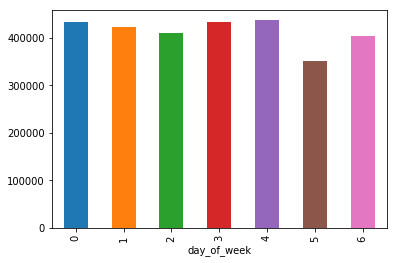

In [29]:
flights['day_of_week'] = flights['date'].dt.dayofweek
flights.groupby('day_of_week').is_delayed.count().plot.bar()

It looks like Saturday is the day of week with less flights! Let's confirm whether the same occur regarding delayed flights.

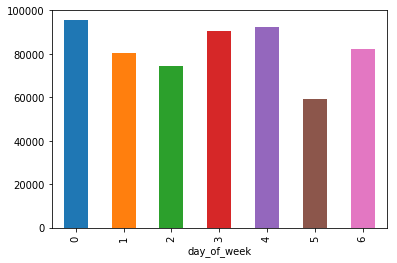

In [30]:
flights[flights.is_delayed].groupby('day_of_week').is_delayed.count().plot.bar()

Indeed, Saturday is the day of week with less delayed flights. Interestingly, Monday and Tuesday have less delayed flights than the remaining weekdays and this is not visible when we look for the number of flights.

#### B1.2 Remove unnecessary columns

Now that I've built the `date` column I can remove the following columns: `year` and `hour`.

In [31]:
# remove columns
flights.drop(['year', 'hour'], axis=1, inplace=True)

#### B1.3 Delayed flight information

I will start by analysing information regarding delayed flights. Let's start by checking its distribution in each airline.

airline
NK    31.66%
F9    31.11%
MQ    25.39%
UA    23.08%
B6    22.46%
EV    21.21%
AA    20.62%
WN    19.72%
VX    18.97%
OO    18.93%
US    18.39%
DL    14.82%
AS    12.52%
HA    11.45%
Name: is_delayed, dtype: object


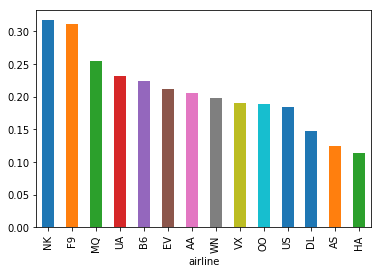

In [32]:
p = flights.groupby('airline').is_delayed.mean().sort_values(ascending = False)

print(p.map(lambda y:'{:.2%}'.format(y)))
p.plot.bar()

The number of delayed flights change a lot among airlines, where 2 airlines have 10% more delayed flights than the percentage of delayed flights in the dataset.

Next, let's have a look to the distribution of the reason for the delay: `airline_delay`, `late_aircraft_delay`, `air_system_delay`, `security_delay` and `weather_delay`, i.e., how does those reasons vary over time?

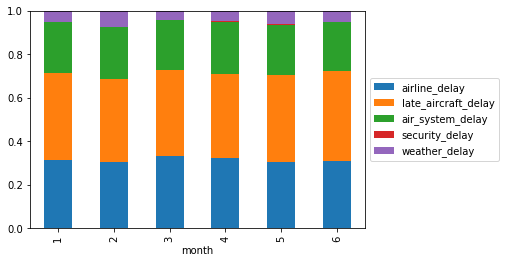

In [33]:
columns = 'month airline_delay late_aircraft_delay air_system_delay security_delay weather_delay'.split()

delays = flights[flights.is_delayed][columns].groupby('month').sum()
total_delay = delays.sum(axis = 1)

for c in delays.columns: 
    delays[c] = delays[c] / total_delay
    
delays.plot.bar(stacked=True, ylim=(0,1)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

OK, monthly the reason of delay looks pretty stable.

In [34]:
columns = 'airline_delay late_aircraft_delay air_system_delay security_delay weather_delay'.split()
flights[flights.is_delayed][columns].mean()

airline_delay         18.624
late_aircraft_delay   23.531
air_system_delay      13.688
security_delay         0.060
weather_delay          3.208
dtype: float32

What contributes most for the delay are the airline, late aircraft, and air system. Next, I'm going to check to top-10 airports with more delayed flights.

In [35]:
flights.groupby('origin_airport').is_delayed.mean().sort_values(ascending = False).head(10)

origin_airport
PPG   0.382
GST   0.375
ILG   0.370
ADK   0.346
PBG   0.321
MEI   0.297
BPT   0.293
STC   0.289
GGG   0.274
TTN   0.273
Name: is_delayed, dtype: float64

The airport with more delayed flights is <a href="https://en.wikipedia.org/wiki/Pago_Pago_International_Airport">PPG</a>. For this airport, let's check the monthly distribution of flights.

In [36]:
mask = flights.origin_airport == 'PPG'

flights[mask].groupby('month').is_delayed.count()

month
1    10
2     8
3     9
4     8
5     9
6    11
Name: is_delayed, dtype: int64

Alright! Initially, based on the big percentage of delayed flights, it seemed that this airport was risky and a candidate for further analysis. However, this airport represents only a tiny percentage of all flights and therefore it is not significant for further analysis.

Next, I will analyse canceled flights.

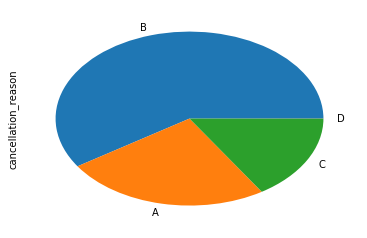

In [37]:
flights[flights.cancelled].cancellation_reason.value_counts().plot.pie(y='y')

The main cancellation reasons are due to weather and airline/carrier.

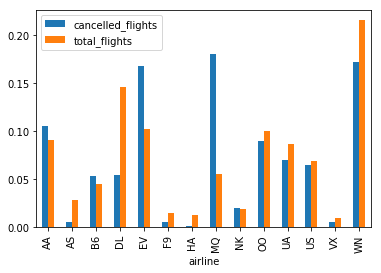

In [38]:
g = flights.groupby('airline').cancelled.agg(['sum','count'])

g.columns = ['cancelled_flights', 'total_flights']
g.cancelled_flights = g.cancelled_flights / g.cancelled_flights.sum()
g.total_flights = g.total_flights / g.total_flights.sum()

g.plot.bar()

Based on this plot we observe that airlines EV and MQ, percentage of all flights, have much more canceled flights than finished flights. Normally this type of domain values are candidates for risky features or one-hot encoding.

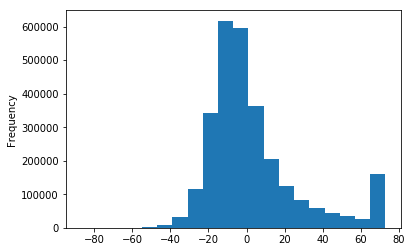

In [39]:
# histogram of arrival delay, where we grouped all values > 95% quantile

flights['arrival_delay_copy'] = flights.arrival_delay

p = flights.arrival_delay_copy.quantile([0.95]).values[0] # 95% quantile

flights.loc[flights.arrival_delay_copy > p, 'arrival_delay_copy'] = p+1
flights.arrival_delay_copy.plot.hist(bins=20)

`arrival_delay` has a long tail distribution, thus I decided to group all values above percentile 95% into one bin. This way I can better see the plot. Interestingly, the majority of flights arrive early than expected.

#### B1.4 Temporal analysis

In this section I'm going to perform some temporal analysis to see if there are pattern changes over time. To do that, first, I'm going to change the flights dataframe index to a datetime column.

In [40]:
flights.set_index('date', inplace=True, drop=False)
flights.index.names = ['date_index'] # avoid ambiguitiy with column 'date'

Let's plot the number of daily flights for the first 2 months (January and February) .

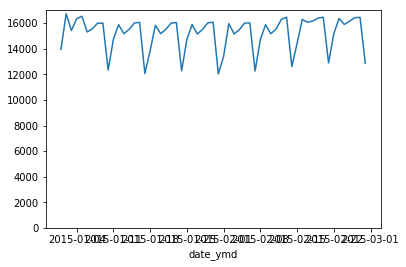

In [41]:
flights['date_ymd'] = flights.index.date
flights[:'2015-02'].groupby('date_ymd').is_delayed.count().plot.line(ylim=(0,17000))

We can see that the distribution is periodic and there are days with much less flights. Let's check that!

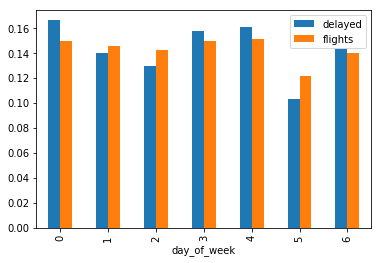

In [42]:
g = flights.groupby('day_of_week').is_delayed.agg(['sum','count'])
g.columns = ['delayed', 'flights']

g.delayed = g.delayed / g.delayed.sum()
g.flights = g.flights / g.flights.sum()

g.plot.bar()

It seems that Saturday is a good to flights, since there are less flight and less delayed flights. Finally, let's check whether there are airlines with an abnormal number of delayed flights in a specific day of the week.

In [43]:
flights.pivot_table(values='is_delayed', index=['day_of_week'], columns=['airline'], aggfunc=np.mean)

airline,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
day_of_week,,,,,,,,,,,,,,
0,0.238,0.134,0.282,0.170,0.238,0.333,0.095,0.277,0.351,0.206,0.252,0.195,0.230,0.212
1,0.174,0.110,0.221,0.158,0.213,0.272,0.080,0.249,0.321,0.183,0.222,0.185,0.168,0.182
2,0.183,0.110,0.183,0.134,0.212,0.332,0.107,0.243,0.284,0.191,0.202,0.159,0.133,0.174
3,0.213,0.128,0.226,0.156,0.220,0.322,0.129,0.264,0.297,0.192,0.254,0.196,0.206,0.215
4,0.223,0.145,0.221,0.153,0.210,0.314,0.168,0.281,0.324,0.195,0.240,0.195,0.215,0.222
5,0.191,0.110,0.204,0.121,0.167,0.287,0.129,0.194,0.296,0.152,0.200,0.167,0.120,0.165
6,0.218,0.138,0.231,0.137,0.213,0.314,0.089,0.255,0.340,0.199,0.237,0.186,0.232,0.205


#### B1.5 Including context information

In this section I will add information from `airports` dataframe. The idea is to add information regarding columns `origin_airpot` and `destination_airport`.

In [44]:
# selecting necessary fields
airports = airports[['iata_code', 'city', 'state']]

flights_tmp = pd.merge(flights, airports, left_on='origin_airport', right_on = 'iata_code') # add origin_airport context information
flights_context_info = pd.merge(flights_tmp, airports, left_on='destination_airport', right_on = 'iata_code', suffixes =('_origin','_destination')) # add destination_airport context information

# free up RAM
del flights_tmp

Let's check the pair of cities with more delayed flights.

In [45]:
flights_context_info['oridst'] = flights_context_info.city_origin + '-' + flights_context_info.city_destination
flights_context_info.groupby('oridst').is_delayed.sum().sort_values(ascending = False).head(10)

oridst
Chicago-New York            1,972.000
Boston-New York             1,925.000
New York-Boston             1,895.000
New York-Chicago            1,728.000
Los Angeles-San Francisco   1,653.000
San Francisco-Los Angeles   1,569.000
Miami-New York              1,560.000
Chicago-Minneapolis         1,508.000
Ft. Lauderdale-New York     1,442.000
Atlanta-New York            1,432.000
Name: is_delayed, dtype: float64

___
### B2. Feature engineering
___

First, I need to rebuild the training, validation and test sets because I've added columns to `flights` dataframe (contextual information and `date`).

Since I want to add features like the average airline delay time, I will also build a historical set with data before training set. There are 2 ways of build these type of features: for each flight in training set I only use flight information occurred before that flight or I use a dataset with information before training and use all that data to compute the feature. Because approach #1 is not trivial to implement I decided to use #2. Note that these approaches are needed to avoid the issue of using future data due to temporal dependency between flights.

Hence, I will use Jan as historical set (17%), Feb and Mar as training set (33%), Apr as validation set (17%) and Mai and Jun as test set (33%).

In [46]:
hist = flights_context_info[flights_context_info.month == 1].copy().reset_index(drop=True)
train = flights_context_info[(flights_context_info.month > 1) & (flights_context_info.month < 4)].copy().reset_index(drop=True)
validation = flights_context_info[flights_context_info.month == 4].copy().reset_index(drop=True)
test = flights_context_info[flights_context_info.month >= 5].copy().reset_index(drop=True)

datasets = [train, validation, test]

# sanity check
assert len(hist) + len(train) + len(validation) + len(test) == len(flights_context_info)

#### B2.1 Historical data

I going to build features based on `hist` for training, validation, and test sets. In future versions I could use information in training set to build that features in validation set and information in validation set to build that features in test set.

Features that will be added:
* percentage of delayed flights per airline;
* percentage of delayed flights per pair (city_origin, city_destination);
* for each city_origin and city_destination, the average delay time.

In [47]:
delays_airline = hist.groupby('airline').is_delayed.mean().to_dict()

for d in datasets:
    d['perc_delayed_flights_airline'] = d.airline.map(lambda airline: delays_airline[airline]).astype(float)

In [48]:
delayed_flights_route = hist.groupby('oridst').is_delayed.mean().to_dict()

for d in datasets:
    d['perc_delayed_flights_route'] = d.oridst.map(lambda oridst: delayed_flights_route[oridst] if oridst in delayed_flights_route else -1)

In [49]:
delayed_city = hist.groupby('city_origin').is_delayed.mean().to_dict()

for d in datasets:
    d['avg_delay_city'] = d.city_origin.map(lambda cityorigin: delayed_city[cityorigin] if cityorigin in delayed_city else -1)

delayed_airline = hist.groupby('airline').arrival_delay.mean().to_dict()

for d in datasets:
    d['avg_delay_airline'] = d.airline.map(lambda airline: delayed_airline[airline] if airline in delayed_airline else -1).astype(float)

#### B2.2 New temporal features

As it was observed, the delayed flights vary with the day of the week, thus I'm going to create features to represent that observation.

In [50]:
def add_temporal_features(df):
    df['is_weekend'] = df.day_of_week.isin([5, 6]).astype(int)
    df['is_monday'] = df.day_of_week.isin([0]).astype(int)
    df['is_saturday'] = df.day_of_week.isin([5]).astype(int)

for d in datasets:
    add_temporal_features(d)

#### B2.3 Risky features and OHE

Risky features are the ones observed during data understanding and in section A.

In [51]:
for d in datasets:
    d['is_risky_airline'] = d.airline.isin(['NK', 'F9', 'MQ', 'EV']).astype(int)
    d['is_risky_origin_airline'] = d.origin_airport.isin(['ORD', 'DFW', 'DEN']).astype(int)
    d['is_risky_destination_airport'] = d.destination_airport.isin(['ORD', 'DFW', 'DEN']).astype(int)

In [52]:
risky_cities = 'newyork boston chicago sanfrancisco losangeles atlanta'.split()

def is_risky_city(city):
    return city.replace(' ', '').lower() in risky_cities

for d in datasets:
    d['is_risky_city'] = d.city_origin.map(is_risky_city) |  d.city_destination.map(is_risky_city)

In section B1.3 I observed that PPG was the `origin_airport` with more delayed flights. I also said that this airport is not important because it almost do not have flights (10 per month). I going to revisit this exploring the airports that have more than 1% of the flights in the historical dataset.

In [53]:
minimum = len(hist) * 0.01
origin_airport = hist.origin_airport.value_counts()[lambda x: x > minimum].index.values

hist[hist.origin_airport.isin(origin_airport)].groupby('origin_airport').is_delayed.mean().sort_values(ascending = False).head(10)

origin_airport
ORD   0.311
DEN   0.290
PHL   0.245
LGA   0.243
DFW   0.243
DTW   0.229
MDW   0.228
JFK   0.226
SFO   0.226
EWR   0.225
Name: is_delayed, dtype: float64

Based on these top `origin_airport` values I'm in conditions to do one hot encoding (OHE).

In [54]:
for d in datasets:
    d['origin_airport_ORD'] = d.origin_airport.map(lambda ori: 1 if ori == 'ORD' else 0)
    d['origin_airport_DEN'] = d.origin_airport.map(lambda ori: 1 if ori == 'DEN' else 0)
    d['origin_airport_PHL'] = d.origin_airport.map(lambda ori: 1 if ori == 'PHL' else 0)
    d['origin_airport_LGA'] = d.origin_airport.map(lambda ori: 1 if ori == 'LGA' else 0)
    d['origin_airport_DFW'] = d.origin_airport.map(lambda ori: 1 if ori == 'DFW' else 0)

#### B2.4 Normalization

In this section I'm going to use `z_score` normalization to `distance` column.

In [55]:
def z_score(df, column, mean, std):
    return (df[column] - df[column].mean())/df[column].std(ddof=0)

mean = hist.distance.mean()
std = hist.distance.std()

for d in datasets:
    d['distance_normalized'] = z_score(d, 'distance', mean, std)

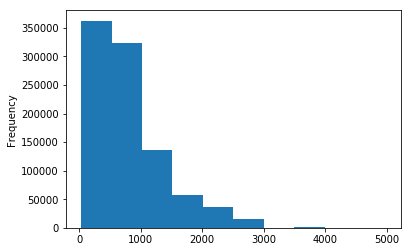

In [56]:
train.distance.plot.hist()

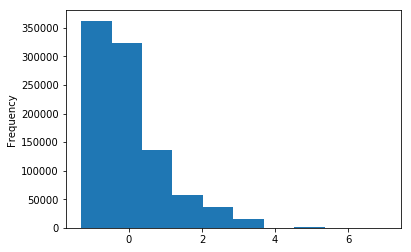

In [57]:
train.distance_normalized.plot.hist()

#### B2.5 Remove unnecessary columns

I'm going to use a logistic regression and a decision tree models. Although decision trees support categorical columns, its sklearn implementation don't. Therefore, before we start building our models we need to remove unnecessary columns like `month`, `airline`, or `tail_number` and keep only the numeric features.

In [58]:
train_bk = train.copy()
validation_bk = validation.copy()
test_bk = test.copy()

In [59]:
columns_to_keep = 'day_of_week scheduled_departure departure_time departure_delay scheduled_time scheduled_arrival is_delayed perc_delayed_flights_airline perc_delayed_flights_route avg_delay_city avg_delay_airline is_weekend is_monday is_saturday is_risky_airline is_risky_origin_airline is_risky_destination_airport is_risky_city origin_airport_ORD origin_airport_DEN origin_airport_PHL origin_airport_LGA origin_airport_DFW distance_normalized'.split()

train = train[columns_to_keep].copy()
validation = validation[columns_to_keep].copy()
test = test[columns_to_keep].copy()

datasets = [train, validation, test]

In [60]:
for d in datasets:
    d['is_delayed'] = d['is_delayed'].astype(int)
    d['is_risky_city'] = d['is_risky_city'].astype(int)

Finally let's compute the feature correlation.

In [61]:
corr = train.corr()

# all entries with correlation below 0.9 will display nan
corr[(corr >= 0.9) | (corr <= -0.9)]

,day_of_week,scheduled_departure,departure_time,departure_delay,scheduled_time,scheduled_arrival,is_delayed,perc_delayed_flights_airline,perc_delayed_flights_route,avg_delay_city,avg_delay_airline,is_weekend,is_monday,is_saturday,is_risky_airline,is_risky_origin_airline,is_risky_destination_airport,is_risky_city,origin_airport_ORD,origin_airport_DEN,origin_airport_PHL,origin_airport_LGA,origin_airport_DFW,distance_normalized
day_of_week,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
scheduled_departure,nan,1.000,0.969,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
departure_time,nan,0.969,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
departure_delay,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
scheduled_time,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.979
scheduled_arrival,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
is_delayed,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
perc_delayed_flights_airline,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,0.981,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
perc_delayed_flights_route,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
avg_delay_city,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


We observe that `avg_delay_airline` and `perc_delayed_flights_airline` features have high correlation, which make sense because those columns represent similar information.
    
Regarding `distance_normalized` and `scheduled_time` features, the correlation is not clear. Maybe, the reason is that flights with large distances occur by night.

## Section C

### C1. Fill NaNs

First, let's fill all NaNs. To do that I can do several things:

* fill using a values outside domain value;
* fill using average;
* fill using some advance technique like KNN.

In [62]:
for d in datasets:
    print(d.isna().sum()[lambda x: x > 0])

departure_time     30698
departure_delay    30698
scheduled_time         2
dtype: int64
departure_time     4253
departure_delay    4253
scheduled_time        2
dtype: int64
departure_time     14034
departure_delay    14034
scheduled_time         2
dtype: int64


In [63]:
for d in datasets:
    d['departure_time'].fillna(1200, inplace=True) # assuming noon
    d['departure_delay'].fillna(0, inplace=True) # assuming no delay
    d['scheduled_time'].fillna(1200, inplace=True) # assuming noon and no delay at departure

### C2. Build logistic regression

In [64]:
# build features set
features = train.columns.drop('is_delayed')

logistic_models = {}

for c in [1.0, 0.5, 0.1]:
    print('C -> %s' % c)
    
    # train logistic regression to predic is_delayed 
    model = LogisticRegression(C=c)
    train_results = model.fit(train[features], train.is_delayed)
    
    logistic_models[c] = model
    
    # use trained model to predit is_delayed field in validation set
    results = model.predict(validation[features])
    
    # get model performance
    metrics = get_metrics(validation.is_delayed, results)
    
    # prettify metrics
    for m in metrics:
        print('{:20} -> {:6.2%}'.format(m, metrics[m]))
        
    print()    

C -> 1.0
Accuracy             -> 92.95%
Recall               -> 66.71%
Precision            -> 88.94%
F1-Score             -> 76.24%
False Positive Rate  ->  1.69%

C -> 0.5
Accuracy             -> 92.95%
Recall               -> 66.72%
Precision            -> 88.95%
F1-Score             -> 76.25%
False Positive Rate  ->  1.69%

C -> 0.1
Accuracy             -> 92.97%
Recall               -> 66.73%
Precision            -> 89.03%
F1-Score             -> 76.28%
False Positive Rate  ->  1.68%



### C3. Build decision tree

In [65]:
# build features set
features = train.columns.drop('is_delayed')

decision_tree_models = {}

for md in [5, 10, 100]:
    print('Max depth -> %s' % md)
    
    # train decision tree to predic is_delayed 
    model = DecisionTreeClassifier(max_depth=md)
    train_results = model.fit(train[features], train.is_delayed)
    
    decision_tree_models[md] = model
    
    # use trained model to predit is_delayed field in validation set
    results = model.predict(validation[features])
    
    # get model performance
    metrics = get_metrics(validation.is_delayed, results)
    
    # prettify metrics
    for m in metrics:
        print('{:20} -> {:6.2%}'.format(m, metrics[m]))
        
    print()    

Max depth -> 5
Accuracy             -> 93.01%
Recall               -> 67.21%
Precision            -> 88.82%
F1-Score             -> 76.52%
False Positive Rate  ->  1.73%

Max depth -> 10
Accuracy             -> 92.91%
Recall               -> 67.18%
Precision            -> 88.21%
F1-Score             -> 76.28%
False Positive Rate  ->  1.83%

Max depth -> 100
Accuracy             -> 88.15%
Recall               -> 68.02%
Precision            -> 64.20%
F1-Score             -> 66.05%
False Positive Rate  ->  7.74%



### C4. Conclusion

The best models are logistic regression with `C=0.1` and decision tree with `max_depth=5`. Let's see the results in test!

In [66]:
# build features set
features = train.columns.drop('is_delayed')

model1 = logistic_models.get(0.1)
model2 = decision_tree_models.get(5)

print("Logistic regression (C=0.1)")

# use trained model to predit is_delayed field in test set
results = model1.predict(test[features])
# get model performance
metrics = get_metrics(test.is_delayed, results)

# prettify metrics
for m in metrics:
    print('{:20} -> {:6.2%}'.format(m, metrics[m]))
    
print()

print("Decision trees (max_depth=5)")

# use trained model to predit is_delayed field in test set
results = model2.predict(test[features])
# get model performance
metrics = get_metrics(test.is_delayed, results)

# prettify metrics
for m in metrics:
    print('{:20} -> {:6.2%}'.format(m, metrics[m]))
    
print()    

Logistic regression (C=0.1)
Accuracy             -> 92.91%
Recall               -> 72.75%
Precision            -> 90.86%
F1-Score             -> 80.80%
False Positive Rate  ->  1.89%

Decision trees (max_depth=5)
Accuracy             -> 92.92%
Recall               -> 73.26%
Precision            -> 90.42%
F1-Score             -> 80.94%
False Positive Rate  ->  2.00%



The results got better in test set! 

For more or less the same FPRate, the f1-score got slightly better results than validation results. With these results I can conclude that we do not have under or over-fitting and the model generalize well for the test set.

As bonus I've plot the decision tree.

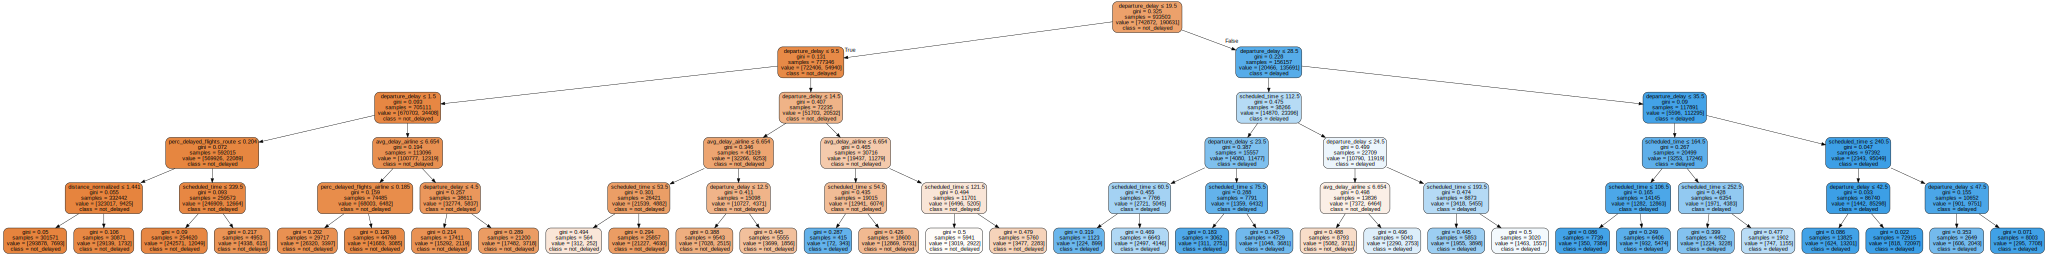

In [71]:
# source: http://scikit-learn.org/stable/modules/tree.html

from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(model2, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(model2, out_file=None, 
                         feature_names=features,  
                         class_names=['not_delayed', 'delayed'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Lastly I would like to thank you for reading the document to the end. Please let me know your thoughts!

___

## You may also like

* [Codility's Problems](https://github.com/inesrosete/DataScience/blob/master/python_exercises.html)
* [Titanic Exploration]() (Available soon)

___

## Acknowledgments

I would like to thank Luís Silva and João Neto for the support and help they had during the execution of the first draft of this challenge between February and March 2018.

___
[Inês Rosete](http://www.linkedin.com/in/inesrosete) | Last editing **June 2018 ** 